# Mini project 1: Mental disorder case in different countries in 2009. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
from scipy.stats import f_oneway
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd



### Mental disorder dataset

In [2]:
depression = pd.read_csv('../DATA/mini_project_1_2009_depression_anxiety_work_group.csv')

In [3]:
depression.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Incidence,Cambodia,Both,20-24 years,Depressive disorders,Rate,2009,3796.527509,5189.955580,2633.147514
1,Incidence,Cambodia,Both,25-29 years,Depressive disorders,Rate,2009,3231.754800,4501.638378,2352.657223
2,Incidence,Cambodia,Both,30-34 years,Depressive disorders,Rate,2009,3067.752114,4275.500472,2265.858788
3,Incidence,Cambodia,Both,35-39 years,Depressive disorders,Rate,2009,3309.308190,4360.844503,2470.700270
4,Incidence,Cambodia,Both,40-44 years,Depressive disorders,Rate,2009,3491.049384,4582.235326,2528.369299


In [4]:
anxiety = depression[depression['cause'] == 'Anxiety disorders']
depression = depression[depression['cause'] == 'Depressive disorders']

In [5]:
dp_val = pd.DataFrame(depression.groupby(by=['location'])['val'].mean('val')).reset_index()

In [6]:
dp_val.head()

,location,val
0,Afghanistan,8655.901804
1,Albania,2885.696414
2,Algeria,6439.932937
3,American Samoa,2745.341504
4,Andorra,5135.881925


In [7]:
ax_val = pd.DataFrame(anxiety.groupby(by=['location'])['val'].mean('val')).reset_index()

In [8]:
ax_val.head()

,location,val
0,Afghanistan,726.941031
1,Albania,632.109163
2,Algeria,723.549163
3,American Samoa,667.166975
4,Andorra,770.732250


In [9]:
df = pd.merge(dp_val, ax_val, how='inner',left_on='location', right_on='location')

In [10]:
print(ax_val.shape)
print(dp_val.shape)
print(df.shape)

(204, 2)
(204, 2)
(204, 3)


In [11]:
df.head()

,location,val_x,val_y
0,Afghanistan,8655.901804,726.941031
1,Albania,2885.696414,632.109163
2,Algeria,6439.932937,723.549163
3,American Samoa,2745.341504,667.166975
4,Andorra,5135.881925,770.732250


In [12]:
df['mental_disorder_rate'] = df['val_x'] + df['val_y']

In [13]:
df.head()

,location,val_x,val_y,mental_disorder_rate
0,Afghanistan,8655.901804,726.941031,9382.842835
1,Albania,2885.696414,632.109163,3517.805577
2,Algeria,6439.932937,723.549163,7163.482100
3,American Samoa,2745.341504,667.166975,3412.508479
4,Andorra,5135.881925,770.732250,5906.614175


### Income group dataset

In [14]:
income = pd.read_csv('../DATA/mini_project_1_country_list_GNI_2009.csv')

In [15]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location_code  218 non-null    object
 1   location       218 non-null    object
 2   income_group   218 non-null    object
dtypes: object(3)
memory usage: 5.2+ KB


In [16]:
income.shape

(218, 3)

In [17]:
income.head()

,location_code,location,income_group
0,AFG,Afghanistan,L
1,ALB,Albania,UM
2,DZA,Algeria,UM
3,ASM,American Samoa,UM
4,AND,Andorra,H


In [18]:
income.isna().sum()

location_code    0
location         0
income_group     0
dtype: int64

In [19]:
income['income_group'].unique()

array(['L', 'UM', 'H', 'LM', '..'], dtype=object)

In [20]:
income.groupby(by='income_group').size()

income_group
..     6
H     69
L     40
LM    56
UM    47
dtype: int64

In [21]:
income[income['income_group'] == '..']

,location_code,location,income_group
27,VGB,British Virgin Islands,..
50,CUW,Curacao,..
137,NRU,Nauru,..
172,SXM,Sint Maarten (Dutch part),..
178,SSD,South Sudan,..
183,MAF,St. Martin (French part),..


In [22]:
# Remove .. group
income = income[income['income_group'] != '..']

In [23]:
income.shape

(212, 3)

#### Merge data

In [24]:
# Merge data

# Generate the country code in df
countries={}

for country in pycountry.countries:
    countries[country.name] = country.alpha_3

df['location_code'] = [countries.get(country, 'Unknown code') for country in df['location']]

In [25]:
df.head()

,location,val_x,val_y,mental_disorder_rate,location_code
0,Afghanistan,8655.901804,726.941031,9382.842835,AFG
1,Albania,2885.696414,632.109163,3517.805577,ALB
2,Algeria,6439.932937,723.549163,7163.482100,DZA
3,American Samoa,2745.341504,667.166975,3412.508479,ASM
4,Andorra,5135.881925,770.732250,5906.614175,AND


In [26]:
df.shape

(204, 5)

In [27]:
df[df['location_code'] == 'Unknown code']

,location,val_x,val_y,mental_disorder_rate,location_code
22,Bolivia (Plurinational State of),5430.056173,951.089743,6381.145916,Unknown code
48,Democratic People's Republic of Korea,2825.998212,569.143488,3395.141700,Unknown code
49,Democratic Republic of the Congo,8842.073171,691.001344,9533.074515,Unknown code
84,Iran (Islamic Republic of),8335.961184,1059.424522,9395.385705,Unknown code
115,Micronesia (Federated States of),3391.345648,664.690712,4056.036360,Unknown code
137,Palestine,12938.956935,796.815329,13735.772264,Unknown code
147,Republic of Korea,2631.254272,535.778168,3167.032440,Unknown code
148,Republic of Moldova,4723.093881,651.104557,5374.198437,Unknown code
177,Taiwan (Province of China),2722.039285,580.754926,3302.794211,Unknown code
186,Turkey,6459.662719,710.339185,7170.001904,Unknown code


Index 10 - North Korea = PRK
Index 27 - Micronesia = FSM
Index 28 - Taiwan - TWN



In [28]:
fix_country = {'48':'PRK',
               '115':'FSM',
               '177':'TWN',
               '147':'KOR',
               '148':'MDA',
               '195':'USA',
               '22':'BOL',
               '137':'PSE',
               '84':'IRN',
               '186':'TUR',
               '199':'VEN',
               '193':'TZA',
               '49':'COD',
               '194':'VIR'}

for key, country in fix_country.items():
    if df.loc[int(key), 'location_code'] == 'Unknown code':
        df.loc[int(key),'location_code'] = country
    #print(key, country)

In [29]:
df.loc[27]

location                   Bulgaria
val_x                    3333.43655
val_y                    593.271667
mental_disorder_rate    3926.708218
location_code                   BGR
Name: 27, dtype: object

In [30]:
df[df['location_code'] == 'Unknown code']

,location,val_x,val_y,mental_disorder_rate,location_code


In [31]:
income.head()

,location_code,location,income_group
0,AFG,Afghanistan,L
1,ALB,Albania,UM
2,DZA,Algeria,UM
3,ASM,American Samoa,UM
4,AND,Andorra,H


In [32]:
df_merge = pd.merge(df,income,how='left',left_on='location_code', right_on='location_code')

In [33]:
df_merge.shape

(204, 7)

In [34]:
df_merge.isna().sum()

location_x              0
val_x                   0
val_y                   0
mental_disorder_rate    0
location_code           0
location_y              5
income_group            5
dtype: int64

In [35]:
df_merge[df_merge['income_group'].isna()]

,location_x,val_x,val_y,mental_disorder_rate,location_code,location_y,income_group
41,Cook Islands,3926.009968,669.217198,4595.227165,COK,NaN,NaN
123,Nauru,3911.363577,668.798814,4580.162391,NRU,NaN,NaN
130,Niue,3905.401105,658.122080,4563.523185,NIU,NaN,NaN
169,South Sudan,6882.148373,804.258820,7686.407193,SSD,NaN,NaN
182,Tokelau,3915.724228,667.029658,4582.753886,TKL,NaN,NaN


In [36]:
df_merge[df_merge['location_y'].isna()]

,location_x,val_x,val_y,mental_disorder_rate,location_code,location_y,income_group
41,Cook Islands,3926.009968,669.217198,4595.227165,COK,NaN,NaN
123,Nauru,3911.363577,668.798814,4580.162391,NRU,NaN,NaN
130,Niue,3905.401105,658.122080,4563.523185,NIU,NaN,NaN
169,South Sudan,6882.148373,804.258820,7686.407193,SSD,NaN,NaN
182,Tokelau,3915.724228,667.029658,4582.753886,TKL,NaN,NaN


In [37]:
# The 5 that are NA can be removed. 

df_merge = df_merge[df_merge['location_y'].isna() == False]

In [38]:
df_merge.shape

(199, 7)

<Axes: xlabel='mental_disorder_rate', ylabel='Count'>

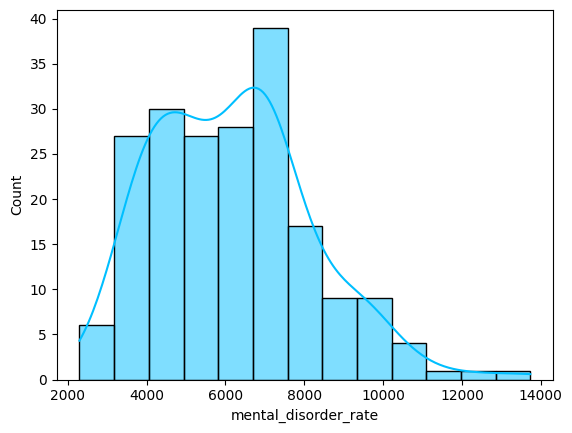

In [39]:
sns.histplot(df_merge['mental_disorder_rate'], kde=True, color='deepskyblue')

The data is slightly light skewed. Transform the data using log transformation. 

In [40]:
df_merge['log_transform'] = np.log(df_merge['mental_disorder_rate'])

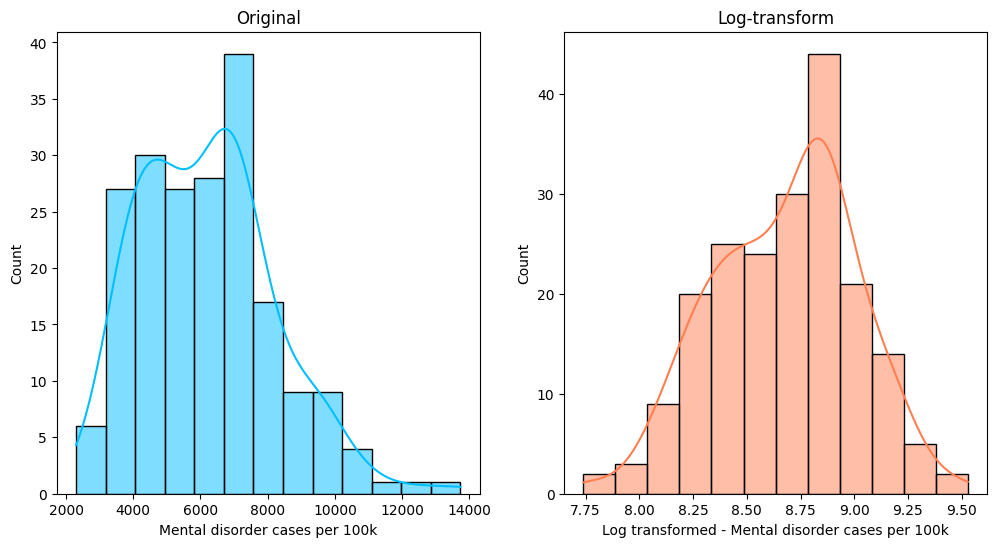

In [41]:
# Plot to check the data
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.histplot(df_merge['mental_disorder_rate'], kde=True, color='deepskyblue', ax=axes[0])
axes[0].set_title('Original')
axes[0].set(xlabel='Mental disorder cases per 100k')
axes[1] = sns.histplot(df_merge['log_transform'], kde=True, color='coral', ax=axes[1])
axes[1].set_title('Log-transform')
axes[1].set(xlabel = 'Log transformed - Mental disorder cases per 100k')

plt.savefig('image_1_histogram.png')

In [42]:
df_merge['mental_disorder_rate'].describe()

count      199.000000
mean      6183.271309
std       2005.426142
min       2298.366942
25%       4557.197599
50%       6227.993477
75%       7271.644857
max      13735.772264
Name: mental_disorder_rate, dtype: float64

In [43]:
df_merge['mental_disorder_rate'].median()

6227.993476986948

#### Analyse the data with log transformation.

In [44]:
df_merge['log_transform'] = np.log(df_merge['mental_disorder_rate'])

In [45]:
df_merge.head()

,location_x,val_x,val_y,mental_disorder_rate,location_code,location_y,income_group,log_transform
0,Afghanistan,8655.901804,726.941031,9382.842835,AFG,Afghanistan,L,9.146638
1,Albania,2885.696414,632.109163,3517.805577,ALB,Albania,UM,8.165593
2,Algeria,6439.932937,723.549163,7163.482100,DZA,Algeria,UM,8.876751
3,American Samoa,2745.341504,667.166975,3412.508479,ASM,American Samoa,UM,8.135203
4,Andorra,5135.881925,770.732250,5906.614175,AND,Andorra,H,8.683828


/var/folders/cj/rzmp7kfn4jg08km6g547jdsjk73ykr/T/ipykernel_20747/491417882.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Low','Lower-Medium','Uper-Medium','High'])


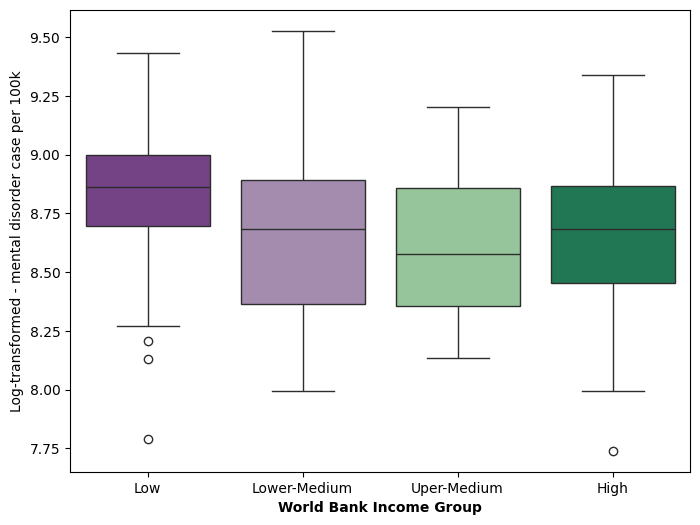

In [46]:
fig, axes = plt.subplots(figsize=(8,6))
#sns.set(font_scale=1)
ax = sns.boxplot(data=df_merge, x='income_group', y='log_transform', hue='income_group', order=['L','LM','UM','H'], 
                 palette=dict(L='#793891', LM='#A686B5', UM='#8ECD95', H='#138457'))
ax.set_xticklabels(['Low','Lower-Medium','Uper-Medium','High'])
ax.set_xlabel('World Bank Income Group', fontdict=dict(weight='bold'))
ax.set_ylabel('Log-transformed - mental disorder case per 100k')
plt.savefig('image_2_boxplot.png')

In [47]:
# Checking for unequal variance
stats.bartlett(df_merge[df_merge['income_group'] == 'L']['log_transform'],
    df_merge[df_merge['income_group'] == 'LM']['log_transform'],
    df_merge[df_merge['income_group'] == 'UM']['log_transform'],
    df_merge[df_merge['income_group'] == 'H']['log_transform'],)


BartlettResult(statistic=1.2261204894376236, pvalue=0.7467465967136115)

In [48]:
fvalue, pvalue = f_oneway(df_merge[df_merge['income_group'] == 'L']['log_transform'],
         df_merge[df_merge['income_group'] == 'LM']['log_transform'],
         df_merge[df_merge['income_group'] == 'UM']['log_transform'],
         df_merge[df_merge['income_group'] == 'H']['log_transform'],)

print(fvalue, pvalue)

2.7814898454480175 0.04221162739554335


In [49]:
tukey = pairwise_tukeyhsd(endog=df_merge['log_transform'], groups=df_merge['income_group'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     H      L   0.1427 0.1484 -0.0312  0.3167  False
     H     LM   0.0064 0.9996  -0.153  0.1658  False
     H     UM  -0.0528 0.8433  -0.219  0.1134  False
     L     LM  -0.1363 0.1857 -0.3116  0.0389  False
     L     UM  -0.1955 0.0291  -0.377 -0.0141   True
    LM     UM  -0.0592 0.7964 -0.2267  0.1083  False
----------------------------------------------------


### Seperate age group

To do:
1. Combine the number of depressive disorder and the number of anxiety by each age group.
2. Generate the country code.

In [50]:
anxiety.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
32,Incidence,Tonga,Both,20-24 years,Anxiety disorders,Rate,2009,651.583510,1122.391074,305.040346
33,Incidence,Tonga,Both,25-29 years,Anxiety disorders,Rate,2009,667.444624,1006.635877,431.603741
34,Incidence,Tonga,Both,30-34 years,Anxiety disorders,Rate,2009,679.298260,983.210713,458.475859
35,Incidence,Tonga,Both,35-39 years,Anxiety disorders,Rate,2009,688.318321,1066.670765,410.567744
36,Incidence,Tonga,Both,40-44 years,Anxiety disorders,Rate,2009,683.628512,1054.654818,418.396157


In [51]:
anxiety.shape

(1632, 10)

In [52]:
depression.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Incidence,Cambodia,Both,20-24 years,Depressive disorders,Rate,2009,3796.527509,5189.955580,2633.147514
1,Incidence,Cambodia,Both,25-29 years,Depressive disorders,Rate,2009,3231.754800,4501.638378,2352.657223
2,Incidence,Cambodia,Both,30-34 years,Depressive disorders,Rate,2009,3067.752114,4275.500472,2265.858788
3,Incidence,Cambodia,Both,35-39 years,Depressive disorders,Rate,2009,3309.308190,4360.844503,2470.700270
4,Incidence,Cambodia,Both,40-44 years,Depressive disorders,Rate,2009,3491.049384,4582.235326,2528.369299


In [53]:
depression.shape

(1632, 10)

In [54]:
test = pd.merge(anxiety,depression, how='inner',left_on=['location','age'], right_on=['location','age'])

In [55]:
test.shape

(1632, 18)

In [56]:
test.head()

,measure_x,location,sex_x,age,cause_x,metric_x,year_x,val_x,upper_x,lower_x,measure_y,sex_y,cause_y,metric_y,year_y,val_y,upper_y,lower_y
0,Incidence,Tonga,Both,20-24 years,Anxiety disorders,Rate,2009,651.583510,1122.391074,305.040346,Incidence,Both,Depressive disorders,Rate,2009,3402.240503,4659.579437,2419.728204
1,Incidence,Tonga,Both,25-29 years,Anxiety disorders,Rate,2009,667.444624,1006.635877,431.603741,Incidence,Both,Depressive disorders,Rate,2009,2895.607844,4033.348406,2114.044892
2,Incidence,Tonga,Both,30-34 years,Anxiety disorders,Rate,2009,679.298260,983.210713,458.475859,Incidence,Both,Depressive disorders,Rate,2009,2608.278842,3637.178703,1851.571987
3,Incidence,Tonga,Both,35-39 years,Anxiety disorders,Rate,2009,688.318321,1066.670765,410.567744,Incidence,Both,Depressive disorders,Rate,2009,2546.601615,3255.893352,1923.858432
4,Incidence,Tonga,Both,40-44 years,Anxiety disorders,Rate,2009,683.628512,1054.654818,418.396157,Incidence,Both,Depressive disorders,Rate,2009,2560.733323,3348.351239,1852.386042


In [57]:
test["test_total_cases"] = test['val_x'] + test['val_y']

In [58]:
test.shape

(1632, 19)

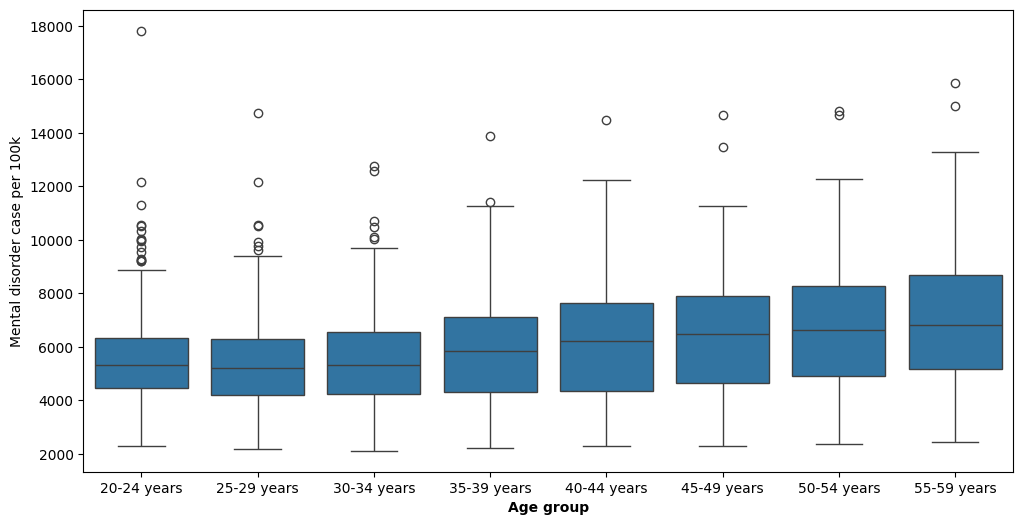

In [59]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.boxplot(data=test, x='age', y='test_total_cases')
ax.set_xlabel('Age group', fontdict=dict(weight='bold'))
ax.set_ylabel('Mental disorder case per 100k')
plt.savefig('image_3_different_cases_by_age.png')

In [60]:
test['location_code'] = [countries.get(country, 'Unknown code') for country in test['location']]

In [61]:
test[test['location_code'] == 'Unknown code']

,measure_x,location,sex_x,age,cause_x,metric_x,year_x,val_x,upper_x,lower_x,measure_y,sex_y,cause_y,metric_y,year_y,val_y,upper_y,lower_y,test_total_cases,location_code
71,Incidence,Democratic People's Republic of Korea,Both,55-59 years,Anxiety disorders,Rate,2009,572.862671,848.432586,363.189945,Incidence,Both,Depressive disorders,Rate,2009,3733.800866,4764.884599,2810.681240,4306.663537,Unknown code
110,Incidence,Democratic People's Republic of Korea,Both,20-24 years,Anxiety disorders,Rate,2009,481.654595,850.405403,225.274866,Incidence,Both,Depressive disorders,Rate,2009,2259.153079,3114.685432,1603.759311,2740.807674,Unknown code
111,Incidence,Democratic People's Republic of Korea,Both,25-29 years,Anxiety disorders,Rate,2009,523.213338,791.491900,343.899684,Incidence,Both,Depressive disorders,Rate,2009,2223.849511,3147.301939,1617.399228,2747.062849,Unknown code
112,Incidence,Democratic People's Republic of Korea,Both,30-34 years,Anxiety disorders,Rate,2009,563.696850,805.101304,372.151708,Incidence,Both,Depressive disorders,Rate,2009,2337.586110,3171.262115,1728.507085,2901.282959,Unknown code
113,Incidence,Democratic People's Republic of Korea,Both,35-39 years,Anxiety disorders,Rate,2009,603.466065,922.365346,360.185711,Incidence,Both,Depressive disorders,Rate,2009,2598.971142,3425.966769,1941.300924,3202.437207,Unknown code
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,Incidence,United States Virgin Islands,Both,35-39 years,Anxiety disorders,Rate,2009,846.327421,1304.169711,504.905025,Incidence,Both,Depressive disorders,Rate,2009,4659.724745,6191.723939,3352.229237,5506.052165,Unknown code
1612,Incidence,United States Virgin Islands,Both,40-44 years,Anxiety disorders,Rate,2009,823.238843,1280.139619,494.227565,Incidence,Both,Depressive disorders,Rate,2009,5063.732866,6763.884170,3607.042815,5886.971710,Unknown code
1613,Incidence,United States Virgin Islands,Both,45-49 years,Anxiety disorders,Rate,2009,763.709452,1076.497717,522.881534,Incidence,Both,Depressive disorders,Rate,2009,5338.740777,6682.191264,4040.986659,6102.450228,Unknown code
1614,Incidence,United States Virgin Islands,Both,50-54 years,Anxiety disorders,Rate,2009,705.060973,941.780583,502.191140,Incidence,Both,Depressive disorders,Rate,2009,5615.338145,7030.236569,4257.023931,6320.399119,Unknown code


In [62]:
unknown_code_country = test[test['location_code'] == 'Unknown code']['location'].unique().tolist()

In [63]:
unknown_code_country

["Democratic People's Republic of Korea",
 'Taiwan (Province of China)',
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'United States of America',
 'Bolivia (Plurinational State of)',
 'Venezuela (Bolivarian Republic of)',
 'Iran (Islamic Republic of)',
 'Palestine',
 'Turkey',
 'Democratic Republic of the Congo',
 'United Republic of Tanzania',
 'United States Virgin Islands']

In [64]:
len(unknown_code_country)

14

In [65]:
code_for_unknown = ['PRK',
                    'TWN',
                    'FSM',
                    'KOR',
                    'MDA',
                    'USA',
                    'BOL',
                    'VEN',
                    'IRN',
                    'PSE',
                    'TUR',
                    'COD',
                    'TZA',
                    'VIR']
len(code_for_unknown)

14

In [66]:
fix_country_2 = dict(zip(unknown_code_country,code_for_unknown))

In [67]:
# Going through each row
# Check if the location in each row is in the list of unknown code
# Change the location code to the code_for unknown in the unknown code country

for i in test.iterrows():
    if i['location'].isin(fix_country_2.keys):
        i.loc['location_code'] == fix_country_2[str(i['location'])]
        


TypeError: tuple indices must be integers or slices, not str

In [ ]:
trial = pd.read_csv('../DATA/mini_project_1_2009_depression_anxiety_work_group.csv')

In [ ]:
trial.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Incidence,Cambodia,Both,20-24 years,Depressive disorders,Rate,2009,3796.527509,5189.955580,2633.147514
1,Incidence,Cambodia,Both,25-29 years,Depressive disorders,Rate,2009,3231.754800,4501.638378,2352.657223
2,Incidence,Cambodia,Both,30-34 years,Depressive disorders,Rate,2009,3067.752114,4275.500472,2265.858788
3,Incidence,Cambodia,Both,35-39 years,Depressive disorders,Rate,2009,3309.308190,4360.844503,2470.700270
4,Incidence,Cambodia,Both,40-44 years,Depressive disorders,Rate,2009,3491.049384,4582.235326,2528.369299


In [72]:
import plotly.express as px
import json

with open('world-countries.json') as f:
    countries_json = json.load(f)


In [73]:
countries_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 'Afghanistan'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[61.210817, 35.650072],
      [62.230651, 35.270664],
      [62.984662, 35.404041],
      [63.193538, 35.857166],
      [63.982896, 36.007957],
      [64.546479, 36.312073],
      [64.746105, 37.111818],
      [65.588948, 37.305217],
      [65.745631, 37.661164],
      [66.217385, 37.39379],
      [66.518607, 37.362784],
      [67.075782, 37.356144],
      [67.83, 37.144994],
      [68.135562, 37.023115],
      [68.859446, 37.344336],
      [69.196273, 37.151144],
      [69.518785, 37.608997],
      [70.116578, 37.588223],
      [70.270574, 37.735165],
      [70.376304, 38.138396],
      [70.806821, 38.486282],
      [71.348131, 38.258905],
      [71.239404, 37.953265],
      [71.541918, 37.905774],
      [71.448693, 37.065645],
      [71.844638, 36.738171],
      [72.193041, 36.948288],
      [72.63689, 37.047558],
      [73.

In [74]:
# Create a DataFrame from the countries JSON
countries_df = pd.DataFrame([country['properties']['name'] for country in countries_json['features']], columns=['Country_Name'])

In [75]:
countries_df.head()

,Country_Name
0,Afghanistan
1,Angola
2,Albania
3,United Arab Emirates
4,Argentina


In [76]:
countries_df.head()

,Country_Name
0,Afghanistan
1,Angola
2,Albania
3,United Arab Emirates
4,Argentina


In [77]:
countries={}

for country in pycountry.countries:
    countries[country.name] = country.alpha_3

countries

{'Aruba': 'ABW',
 'Afghanistan': 'AFG',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Andorra': 'AND',
 'United Arab Emirates': 'ARE',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'American Samoa': 'ASM',
 'Antarctica': 'ATA',
 'French Southern Territories': 'ATF',
 'Antigua and Barbuda': 'ATG',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Burundi': 'BDI',
 'Belgium': 'BEL',
 'Benin': 'BEN',
 'Bonaire, Sint Eustatius and Saba': 'BES',
 'Burkina Faso': 'BFA',
 'Bangladesh': 'BGD',
 'Bulgaria': 'BGR',
 'Bahrain': 'BHR',
 'Bahamas': 'BHS',
 'Bosnia and Herzegovina': 'BIH',
 'Saint Barthélemy': 'BLM',
 'Belarus': 'BLR',
 'Belize': 'BLZ',
 'Bermuda': 'BMU',
 'Bolivia, Plurinational State of': 'BOL',
 'Brazil': 'BRA',
 'Barbados': 'BRB',
 'Brunei Darussalam': 'BRN',
 'Bhutan': 'BTN',
 'Bouvet Island': 'BVT',
 'Botswana': 'BWA',
 'Central African Republic': 'CAF',
 'Canada': 'CAN',
 'Cocos (Keeling) Islands': 'CCK',
 'Switzerland': 'CHE',
 

In [78]:
countries_df['location_code'] = [countries.get(country, 'Unknown code') for country in countries_df['Country_Name']]

In [79]:
countries_df.head()

,Country_Name,location_code
0,Afghanistan,AFG
1,Angola,AGO
2,Albania,ALB
3,United Arab Emirates,ARE
4,Argentina,ARG


In [80]:
countries_df[countries_df['location_code'] == 'Unknown code']

,Country_Name,location_code
7,French Southern and Antarctic Lands,Unknown code
17,The Bahamas,Unknown code
21,Bolivia,Unknown code
23,Brunei,Unknown code
31,Ivory Coast,Unknown code
33,Democratic Republic of the Congo,Unknown code
34,Republic of the Congo,Unknown code
38,Northern Cyprus,Unknown code
40,Czech Republic,Unknown code
54,Falkland Islands,Unknown code


In [82]:
fix_country = {'7':'ATF',
               '17':'BHS',
               '21':'BOL',
               '23':'BRN',
               '31':'CIV',
               '33':'COD',
               '34':'COG',
               '38':'CNP',
               '40':'CZE',
               '54':'FLK',
               '62':'GNB',
               '75':'IRN',
               '87':'KOR',
               '88':'XKK',
               '90':'LAO',
               '100':'MDA',
               '103':'MKD',
               '129':'PRK',
               '134':'RUS',
               '146':'SRB',
               '151':'SWZ',
               '152':'SYR',
               '158':'TMP',
               '161':'TUR',
               '162':'TWN',
               '163':'TZA',
               '167':'USA',
               '169':'VEN',
               '170':'VNM'}

for key, country in fix_country.items():
    if countries_df.loc[int(key), 'location_code'] == 'Unknown code':
        countries_df.loc[int(key),'location_code'] = country

In [83]:
countries_df[countries_df['location_code'] == 'Unknown code']

,Country_Name,location_code
144,Somaliland,Unknown code
172,West Bank,Unknown code


In [84]:
df_merge.head()

,location_x,val_x,val_y,mental_disorder_rate,location_code,location_y,income_group,log_transform
0,Afghanistan,8655.901804,726.941031,9382.842835,AFG,Afghanistan,L,9.146638
1,Albania,2885.696414,632.109163,3517.805577,ALB,Albania,UM,8.165593
2,Algeria,6439.932937,723.549163,7163.482100,DZA,Algeria,UM,8.876751
3,American Samoa,2745.341504,667.166975,3412.508479,ASM,American Samoa,UM,8.135203
4,Andorra,5135.881925,770.732250,5906.614175,AND,Andorra,H,8.683828


In [85]:
country_case = pd.merge(df_merge,countries_df,how='inner',left_on='location_code', right_on='location_code')

In [86]:
country_case.head()

,location_x,val_x,val_y,mental_disorder_rate,location_code,location_y,income_group,log_transform,Country_Name
0,Afghanistan,8655.901804,726.941031,9382.842835,AFG,Afghanistan,L,9.146638,Afghanistan
1,Albania,2885.696414,632.109163,3517.805577,ALB,Albania,UM,8.165593,Albania
2,Algeria,6439.932937,723.549163,7163.482100,DZA,Algeria,UM,8.876751,Algeria
3,Angola,9701.664350,714.443558,10416.107908,AGO,Angola,LM,9.251109,Angola
4,Argentina,3725.197635,809.287742,4534.485376,ARG,Argentina,UM,8.419467,Argentina


In [87]:
plot = country_case[['Country_Name','mental_disorder_rate']]

In [88]:
plot.head()

,Country_Name,mental_disorder_rate
0,Afghanistan,9382.842835
1,Albania,3517.805577
2,Algeria,7163.482100
3,Angola,10416.107908
4,Argentina,4534.485376


In [118]:
# Create the choropleth map
import plotly.express as px
fig = px.choropleth(plot,
                    locations='Country_Name',
                    geojson=countries_json,
                    color='mental_disorder_rate',
                    featureidkey="properties.name",
                    color_continuous_scale='YlOrRd',
                    labels={'mental_disorder_rate':'Mental disorder cases per 100k'})

fig.update_geos(fitbounds="locations", visible=False)
fig.update_coloraxes(colorbar_orientation='h',colorbar_thickness=20)
#plt.savefig('image_4_mental_disorder_cases.png')

In [119]:
plot.to_csv('mental_disorder_per100k_country.csv')